In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import time

# constants 
h = 6.63e-34 # Js
h_bar = 1.05e-34 # Js
m = 9.109e-31 # kg
v = 3e8 #m/s
λ = 2.42e-12 #m
N = 150
L = 1e-8 #m 
x0 = L / 2
sigma = 1e-10 #m
k = 5e10 # m^-1
dx = L/N
dt = 1e-18 # s

start = time.time()
# solve for a1, a2
a1 = 1 + dt * ((1j * h_bar) / (2*m*dx**2))
a2 = - dt * ((1j*h_bar)/ (4*m*dx**2))

# solve for b1, b2
b1 = 1 - dt * ((1j * h_bar) / (2*m*dx**2)) 
b2 = dt * ((1j*h_bar)/ (4*m*dx**2))

# create A matrix 
A = np.diagflat([a2 for i in range(N-1)], -1) +\
        np.diagflat([a1]+[a1 for i in range(N-2)]+[a1]) +\
        np.diagflat([a2 for i in range(N-1)], 1)
A = np.array(A)

# create B matrix
B = np.diagflat([b2 for i in range(N-1)], -1) +\
        np.diagflat([b1]+[b1 for i in range(N-2)]+[b1]) +\
        np.diagflat([b2 for i in range(N-1)], 1)
B = np.array(B)

# create psi matrix
x = np.linspace(0, L, N)
psi = np.zeros((N, N))
psi[0, :] = np.exp(-((x - x0)**2/(2*sigma**2))) * np.exp(1j*k*x)

/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_12892/1487459634.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  psi[0, :] = np.exp(-((x - x0)**2/(2*sigma**2))) * np.exp(1j*k*x)


In [34]:
for i in range(1, 101):
    current_psi = psi[i-1, :]
    next_psi = np.linalg.solve(A, B.dot(current_psi))
    psi[i, :] = next_psi
end = time.time()
difference = end - start
print(difference)

0.11986088752746582


/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_12892/1587257988.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  psi[i, :] = next_psi


Text(0.5, 1.0, 'Crank-Nicolson Finite Difference Method of the Schrödinger Equation at t = 1e-16')

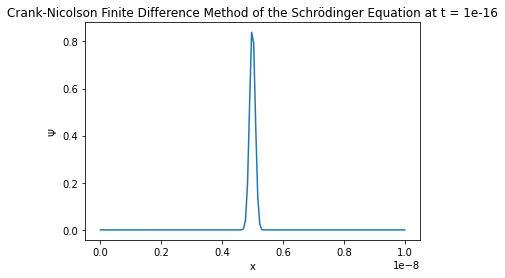

In [35]:
# at t = 1e-16, dt = 1e-18 (i.e. 100 time steps)
plt.plot(x, abs(psi[100, :]))
plt.xlabel("x")
plt.ylabel("Ψ")
plt.title("Crank-Nicolson Finite Difference Method of the Schrödinger Equation at t = 1e-16")

/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_12892/2712318557.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  psi[0, :] = np.exp(-((x - x0)**2/(2*sigma**2))) * np.exp(1j*k*x)
/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_12892/2712318557.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  psi[i, :] = next_psi


5.3806939125061035


Text(0.5, 1.0, 'Crank-Nicolson Finite Difference Method of the Schrödinger Equation at t = 1e-16')

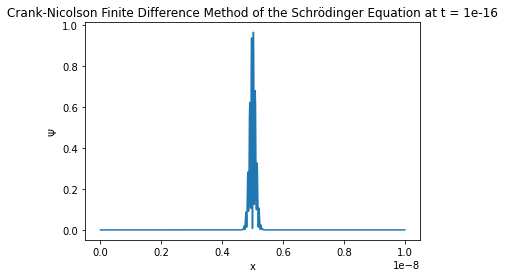

In [36]:
N = 1000
start = time.time()
# solve for a1, a2
a1 = 1 + dt * ((1j * h_bar) / (2*m*dx**2))
a2 = - dt * ((1j*h_bar)/ (4*m*dx**2))

# solve for b1, b2
b1 = 1 - dt * ((1j * h_bar) / (2*m*dx**2)) 
b2 = dt * ((1j*h_bar)/ (4*m*dx**2))

# create A matrix 
A = np.diagflat([a2 for i in range(N-1)], -1) +\
        np.diagflat([a1]+[a1 for i in range(N-2)]+[a1]) +\
        np.diagflat([a2 for i in range(N-1)], 1)
A = np.array(A)

# create B matrix
B = np.diagflat([b2 for i in range(N-1)], -1) +\
        np.diagflat([b1]+[b1 for i in range(N-2)]+[b1]) +\
        np.diagflat([b2 for i in range(N-1)], 1)
B = np.array(B)

# create psi matrix
x = np.linspace(0, L, N)
psi = np.zeros((N, N))
psi[0, :] = np.exp(-((x - x0)**2/(2*sigma**2))) * np.exp(1j*k*x)

for i in range(1, 101):
    current_psi = psi[i-1, :]
    next_psi = np.linalg.solve(A, B.dot(current_psi))
    psi[i, :] = next_psi
end = time.time()
difference = end - start
print(difference)

# at t = 1e-16, dt = 1e-18 (i.e. 100 time steps)
plt.plot(x, abs(psi[100, :]))
plt.xlabel("x")
plt.ylabel("Ψ")
plt.title("Crank-Nicolson Finite Difference Method of the Schrödinger Equation at t = 1e-16")

0.022903919219970703


Text(0.5, 1.0, 'Pseudospectral fast Fourier transform Method of the Schrödinger Equation at t = 1e-16')

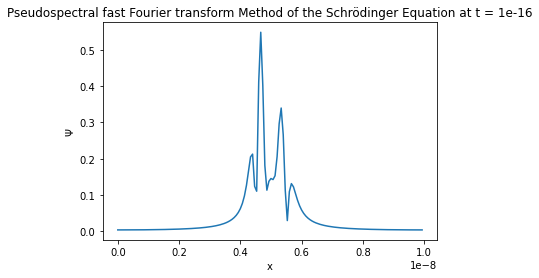

In [38]:
# Psuedospectral method 
h_bar = 1.05e-34 # Js
m = 9.109e-31 # kg
sigma = 1e-10 #m
k = 5e10 # m^-1

a_squared = (1j*h_bar)/(2*m)
L = 1e-8 #m 
x0 = L / 2
dx = L/N

start = time.time()
a_squared = (1j*h_bar)/(2*m)
N = 150

x = np.arange(0, L, dx)
kappa = 2 * np.pi * np.fft.fftfreq(N, d = dx)
psi_0 = lambda x_r: np.exp(-(x_r-x0)**2/(2*sigma**2)) * np.exp(1j * k * x_r)

psi0 = psi_0(x)
psi0hat = np.fft.fft(psi0)
psi0hat_ri = np.concatenate((psi0hat.real, psi0hat.imag))

dt = 1e-16/100
t = np.arange(0, 1e-16, dt)

def rhs_quantum(psihat_ri, t, kappa, alpha_squared):
    psihat = psihat_ri[:N] + 1j * psihat_ri[N:]
    d_psihat = -alpha_squared * (np.power(kappa, 2)) * psihat
    d_psihat_ri = np.concatenate((d_psihat.real, d_psihat.imag)).astype('float64')
    return d_psihat_ri

psihat_ri = odeint(rhs_quantum, psi0hat_ri, t, args = (kappa, a_squared))

psihat = psihat_ri[:,:N] + 1j * psihat_ri[:,N:]
psi = np.zeros_like(psihat)
for i in range(len(t)):
    psi[i,:] = np.fft.ifft(psihat[i,:])
psi = psi.real

end = time.time() 
difference = end - start
print(difference)

plt.plot(x, abs(psi[-1]))
plt.xlabel("x")
plt.ylabel("Ψ")
plt.title("Pseudospectral fast Fourier transform Method of the Schrödinger Equation at t = 1e-16")

0.15822792053222656


Text(0.5, 1.0, 'Pseudospectral fast Fourier transform Method of the Schrödinger Equation at t = 1e-16')

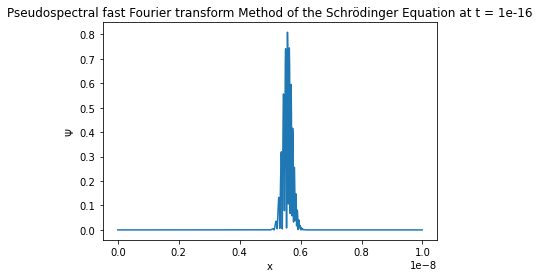

In [41]:
# Psuedospectral method with N = 1000
start = time.time()
a_squared = (1j*h_bar)/(2*m)
N = 1000

x = np.arange(0, L, dx)
kappa = 2 * np.pi * np.fft.fftfreq(N, d = dx)
psi_0 = lambda x_r: np.exp(-(x_r-x0)**2/(2*sigma**2)) * np.exp(1j * k * x_r)

psi0 = psi_0(x)
psi0hat = np.fft.fft(psi0)
psi0hat_ri = np.concatenate((psi0hat.real, psi0hat.imag))

dt = 1e-16/100
t = np.arange(0, 1e-16, dt)

def rhs_quantum(psihat_ri, t, kappa, alpha_squared):
    psihat = psihat_ri[:N] + 1j * psihat_ri[N:]
    d_psihat = -alpha_squared * (np.power(kappa, 2)) * psihat
    d_psihat_ri = np.concatenate((d_psihat.real, d_psihat.imag)).astype('float64')
    return d_psihat_ri

psihat_ri = odeint(rhs_quantum, psi0hat_ri, t, args = (kappa, a_squared))

psihat = psihat_ri[:,:N] + 1j * psihat_ri[:,N:]
psi = np.zeros_like(psihat)
for i in range(len(t)):
    psi[i,:] = np.fft.ifft(psihat[i,:])
psi = psi.real

end = time.time() 
difference = end - start
print(difference)

plt.plot(x, abs(psi[-1]))
plt.xlabel("x")
plt.ylabel("Ψ")
plt.title("Pseudospectral fast Fourier transform Method of the Schrödinger Equation at t = 1e-16")